In [94]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

import scipy.sparse as sparse
from scipy.interpolate import interp1d
from scipy.signal import argrelextrema

from read_dsc import readDSC
from baseline import *

In [95]:
files1 = glob.glob("*20*.txt") 
files2 = glob.glob("*10*.txt") 

# Look at individual measurements:

Date: 03.03.2017
Method: GMM_20Cmin_pBTTT_ketolactam_to350C
Name: ]1[DSC700929_pbtttketo20%
Weigth: 8.22 [mg]



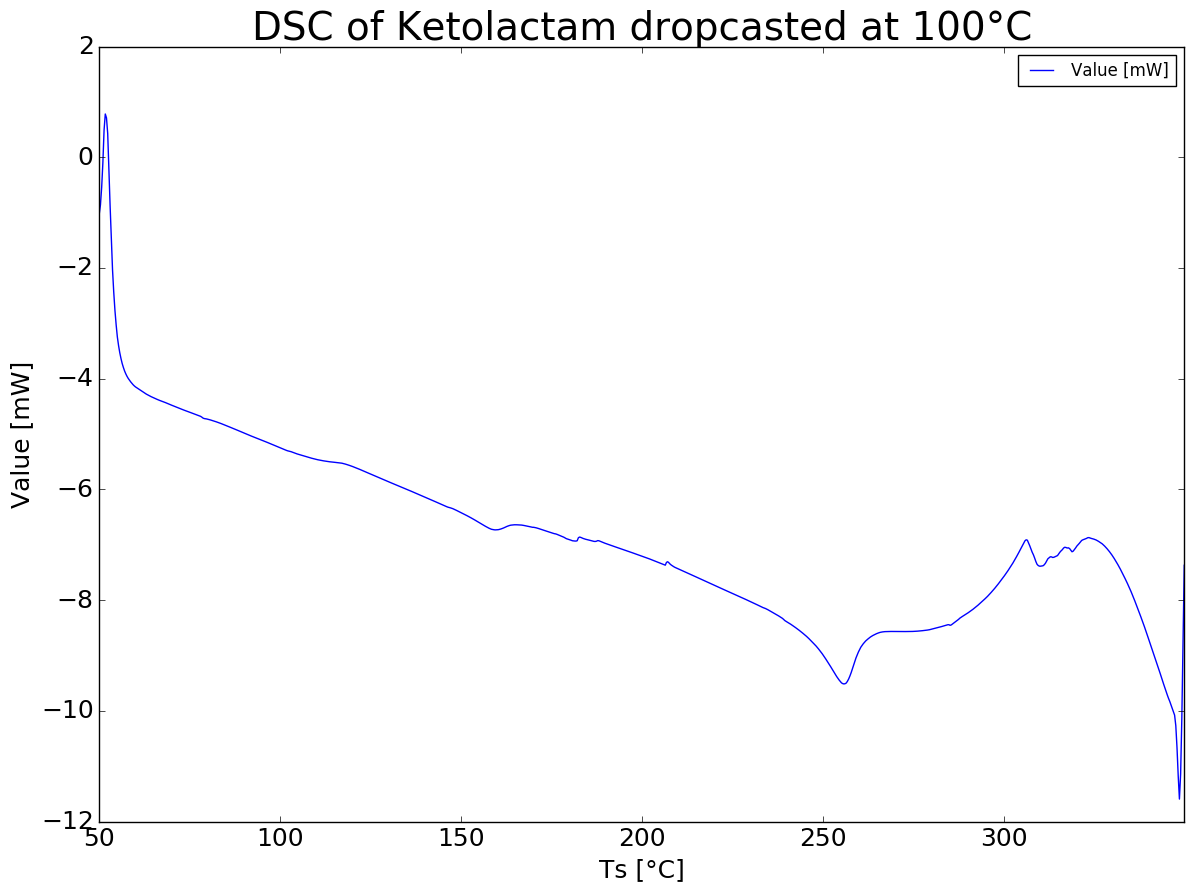

,Index,Abscissa [°C],Ts [°C],Tr [°C],Value [mW]
0,0.0,0.0,50.025,50.000,-1.026270
1,1.0,1.0,50.355,50.333,-0.859606
2,2.0,2.0,50.680,50.667,-0.544663
3,3.0,3.0,51.002,51.000,-0.099235
4,4.0,4.0,51.321,51.333,0.491635


In [96]:
# Import heating cycle
curve = readDSC(files1[0])[3] # there are four courves in each measurement

print("Date: " + str(curve.date) + "\n"
      + "Method: " + curve.method + "\n"
      + "Name: " + str(curve.name) + "\n"
      + "Weigth: " + str(curve.weight) + " [mg]" + "\n")

curve.plot(x="Tr [°C]",y="Value [mW]", figsize=(14,10),sort_columns=True,fontsize=18)
plt.title("DSC of Ketolactam dropcasted at 100°C", fontsize=28)
plt.xlabel("Ts [°C]",fontsize=18)
plt.ylabel("Value [mW]",fontsize=18)
#plt.style.use('fivethirtyeight')
#plt.savefig("DPPTTT liquid cristal, ODCB 120°C.eps")
plt.show()

curve.head()

# Read in all data for phase-diagram

In [93]:
data = pd.DataFrame()
metaData = pd.DataFrame(columns=["Attribute"], data=["Name", "Date", "Method", "Weigth"])

def readInFiles(files, dataFrame, metaFrame):
    for i in files:
        data["Tr [°C]"] = readDSC(i)[3]["Tr [°C]"][30:-30] # cut edges from data
        data[i[:-4]] = readDSC(i)[3]["Value [mW]"][30:-30] # Otherwise baseline_LSNF(boundaries=False)
        metaData[i[:-4]] = [readDSC(i)[3].name, readDSC(i)[3].date,
                            readDSC(i)[3].method, readDSC(i)[3].weight]
        
for i in [files1, files2, files3]:
    readInFiles(i, data, metaData)
data.head()

IndexError: list index out of range

In [5]:
metaData

,Attribute,DSC700729_Ketolactan_120C_20CperMin,DSC700728_pBTTT_120C_20CperMin,31-10-16/DSC700708_pBTTT_ketolectan_90perc_100C,31-10-16/DSC700711_pBTTT_ketolectan_60perc_100C,31-10-16/DSC700713_pBTTT_ketolectan_40perc_100C,31-10-16/DSC700714_pBTTT_ketolectan_30perc_100C,31-10-16/DSC700709_pBTTT_ketolectan_80perc_100C,31-10-16/DSC700710_pBTTT_ketolectan_70perc_100C,31-10-16/DSC700712_pBTTT_ketolectan_50perc_100C,11-11-2016/DSC700740_pBTTT_Ketolactan_725perc_120C_20CperMin,11-11-2016/DSC700737_pBTTT_Ketolactan_625perc_120C_20CperMin,11-11-2016/DSC700735_pBTTT_Ketolactan_55perc_120C_20CperMin,11-11-2016/DSC700739_pBTTT_Ketolactan_675perc_120C_20CperMin,11-11-2016/DSC700738_pBTTT_Ketolactan_65perc_120C_20CperMin,11-11-2016/DSC700741_pBTTT_Ketolactan_75perc_120C_20CperMin,11-11-2016/DSC700736_pBTTT_Ketolactan_575perc_120C_20CperMin
0,Name,]1[DSC700729,]1[DSC700728,]1[DSC700708,]1[DSC700711,]1[DSC700713,]1[DSC700714,]1[DSC700709,]1[DSC700710,]1[DSC700712,]1[DSC700740,]1[DSC700737,]1[DSC700735,]1[DSC700739,]1[DSC700738,]1[DSC700741,]1[DSC700736
1,Date,07.11.2016,07.11.2016,01.11.2016,01.11.2016,31.10.2016,01.11.2016,01.11.2016,01.11.2016,31.10.2016,14.11.2016,14.11.2016,14.11.2016,14.11.2016,14.11.2016,14.11.2016,14.11.2016
2,Method,GMM_20Cmin_pBTTT_ketolactam,GMM_20Cmin_pBTTT_ketolactam,GMM_20Cmin_pBTTT_ketolactam,GMM_20Cmin_pBTTT_ketolactam,GMM_20Cmin_pBTTT_ketolactam,GMM_20Cmin_pBTTT_ketolactam,GMM_20Cmin_pBTTT_ketolactam,GMM_20Cmin_pBTTT_ketolactam,GMM_20Cmin_pBTTT_ketolactam,GMM_20Cmin_pBTTT_ketolactam,GMM_20Cmin_pBTTT_ketolactam,GMM_20Cmin_pBTTT_ketolactam,GMM_20Cmin_pBTTT_ketolactam,GMM_20Cmin_pBTTT_ketolactam,GMM_20Cmin_pBTTT_ketolactam,GMM_20Cmin_pBTTT_ketolactam
3,Weigth,2.63,3.33,2.73,3.5,5.59,7.69,3.21,3.64,4.97,3.56,4.4,4.6,3.7,4.09,3.7,4.57


# Try to find baselines with algorithm:
Inspect each plot !! and close windows with good fit. The remaining windows have to be redone by hand.

In [70]:
baseline_LSNF?

Using matplotlib backend: MacOSX


,DSC700929_pBTTTketo_20%a
0,"[-4.1844708289, -4.19453406141, -4.20459640165..."
1,"[True, True, True, True, True, True, True, Tru..."


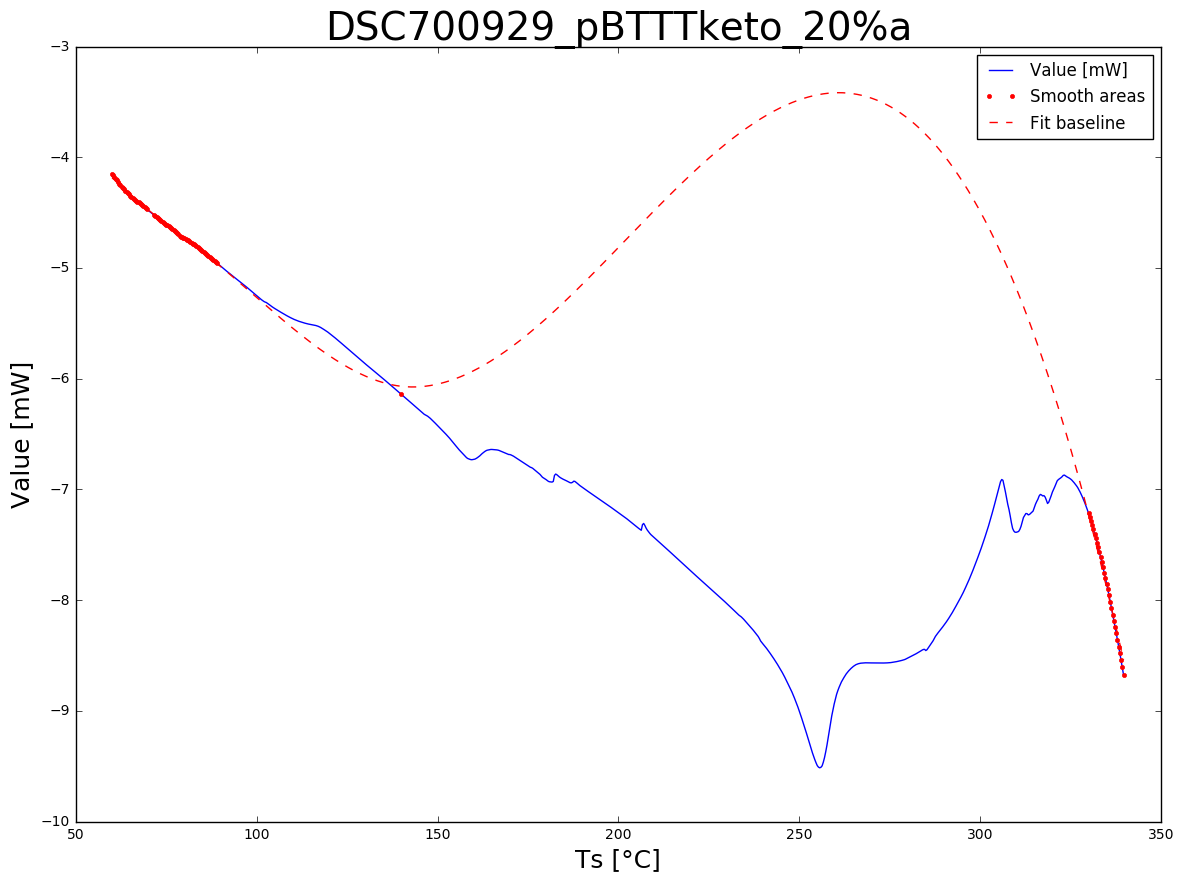

In [71]:
% matplotlib

c = data.columns
baselines = pd.DataFrame()
for i in range(1,len(c)):
    baselines[c[i]] = baseline_LSNF(data[c[i]], dy=0.03)
    

c = baselines.columns
for i in c:
    x = data["Tr [°C]"]
    y = data[i]
    yBase = baselines[i][0]
    xfreeze = x[list(baselines[i][1])]
    yfreeze = y[list(baselines[i][1])]
    
    plt.figure(figsize=(14,10))
    plt.plot(x, y, "-b", xfreeze, yfreeze, ".r", x, yBase, "--r")
    plt.title(i, fontsize=28)
    plt.xlabel("Ts [°C]",fontsize=18)
    plt.ylabel("Value [mW]",fontsize=18)
    plt.legend(["Value [mW]", "Smooth areas", "Fit baseline"], loc="best")
    plt.show()

baselines.head()

# Cubic spline interpolation of the remaining baselines by hand

In [75]:
def cubicBase(xCol,yCol,valueList):
    # Interpolate
    mask = data[xCol].isin(baseLine)
    x = data[xCol][mask]
    y = data[yCol][mask]
    f = interp1d(x, y, kind='cubic', bounds_error=False) # New in version 0.17.0.: fill_value=“extrapolate”

    # Plot together
    xNew = data[xCol]
    yNew = f(data[xCol])

    plt.figure(figsize=(14,10))
    plt.plot(xNew,data[yCol], "-b", x, y, "or", xNew, yNew, "--r")
    plt.title(yCol, fontsize=28)
    plt.xlabel(xCol,fontsize=18)
    plt.ylabel(yCol,fontsize=18)
    plt.legend([yCol, "Points for interpolation", "Cubic spline interpolation"], loc="best")
    plt.show()
    
    # Store new baseline
    baselines[yCol][0] = yNew
    baselines[yCol][1] = [mask]
    
    

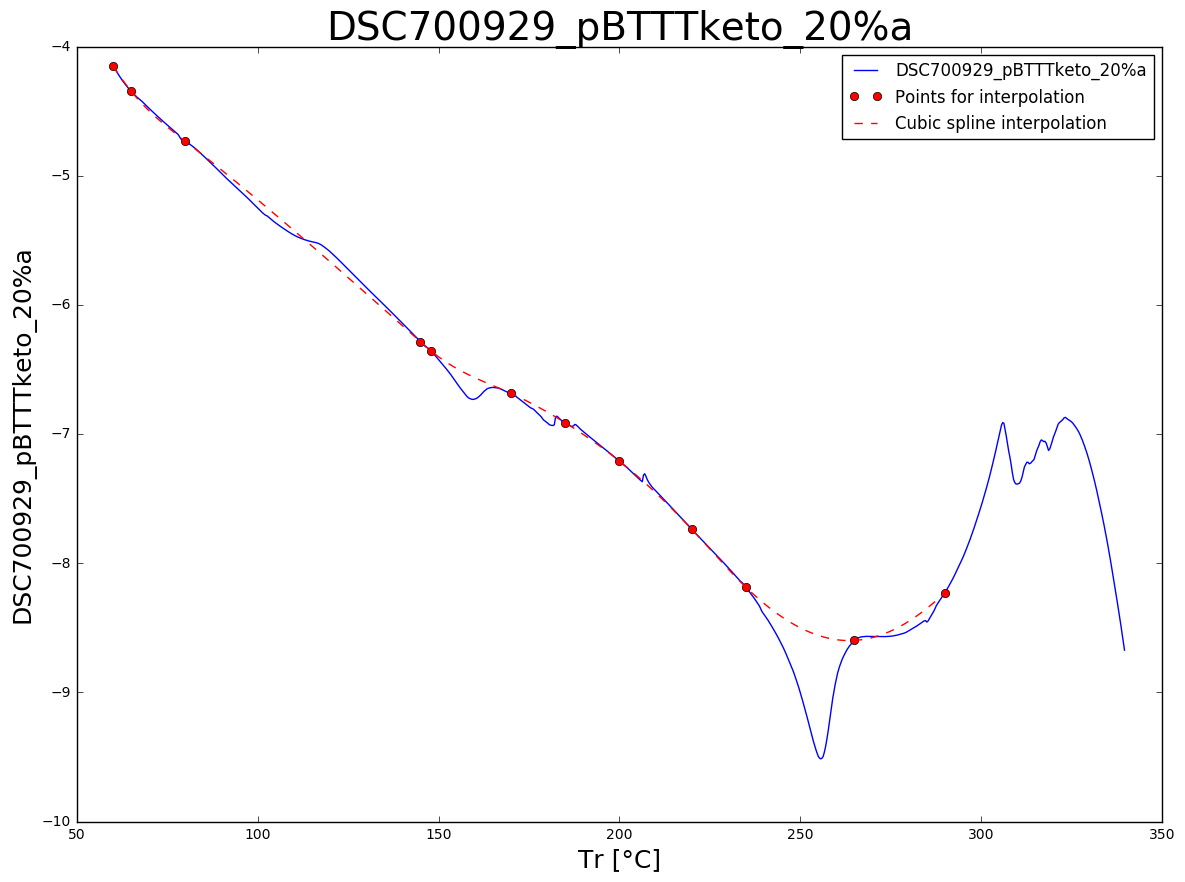

In [76]:
# Figure 2
xCol = "Tr [°C]"

yCol = "DSC700929_pBTTTketo_20%a"
baseLine = [60,65,80,145,148,170,185,200,220,235,265,290] # Fill list with as much values as you like

cubicBase(xCol,yCol,baseLine)

# Substract baselines from data and save curves

In [77]:
c = baselines.columns
cleanData = pd.DataFrame(data["Tr [°C]"])

for i in c:
    cleanData[i] = data[i] - baselines[i][0]

cleanData.to_csv("pBTTT_20" + "_cleanData.csv")
cleanData.head()

,Tr [°C],DSC700929_pBTTTketo_20%a
30,60.000,8.881784e-16
31,60.333,1.146239e-04
32,60.667,-1.306530e-03
33,61.000,-2.326465e-03
34,61.333,-3.326681e-03


# Plot Curves together, normalized by weight

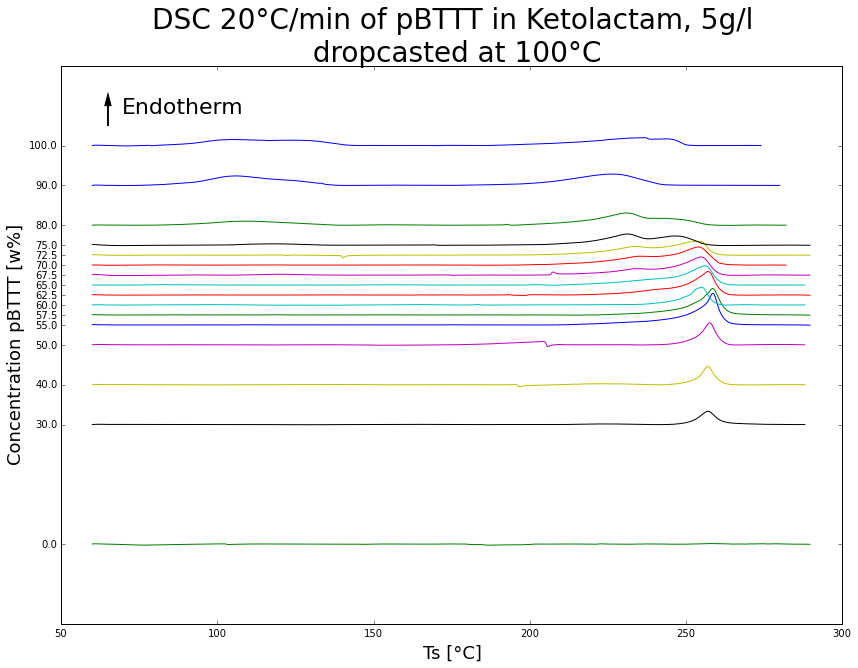

In [19]:
%matplotlib inline
# Dependent on concentration
c = list(baselines.columns)
c.sort()

concentrations = [55, 57.5, 62.5, 65, 67.5, 72.5, 75, 90, 80, 70, 60, 50, 40, 30, 100, 0]

x = cleanData["Tr [°C]"]
plt.figure(figsize=(14,10))

for i in range(len(c)):
    offset = concentrations[i]
    weight = metaData[c[i]][3]
    plt.plot(x, ((cleanData[c[i]] / weight) * 17 + offset))

plt.title("DSC 20°C/min of pBTTT in Ketolactam, 5g/l\n dropcasted at 100°C", fontsize=28)
plt.xlabel("Ts [°C]", fontsize=18)
plt.yticks(concentrations)
plt.ylabel("Concentration pBTTT [w%]", fontsize=18)
#plt.xlim(230,270)
#plt.ylim(30,110)
plt.text(70,108,"Endotherm",fontsize=22)
plt.arrow(65, 105, 0, 5, color="black", width=.2, head_width=2)
plt.savefig("DSC 20CPerMin of pBTTT in ketolactan dropcasted at 100C 20C_per_min" + ".svg", format="svg")
plt.show()

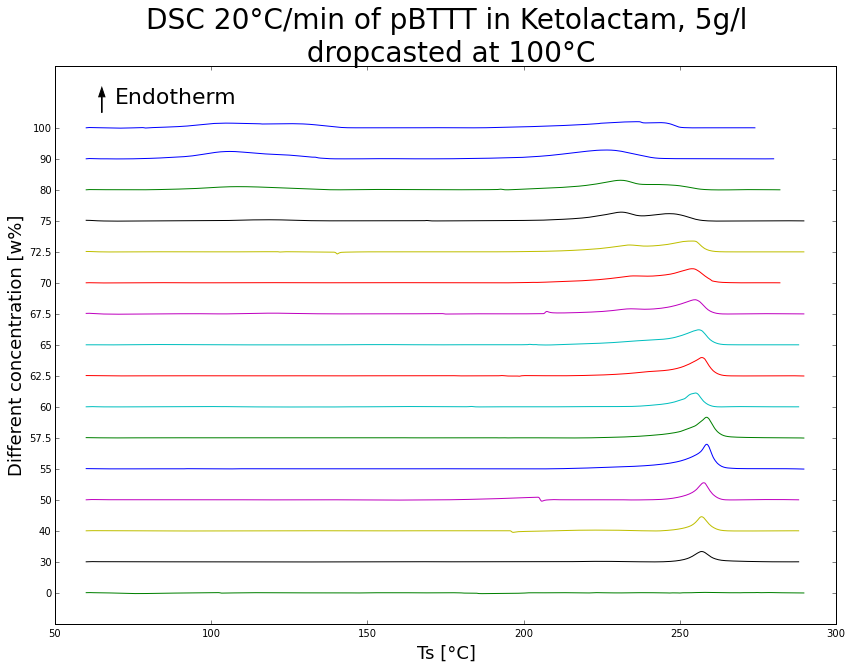

In [20]:
# Dependent on concentration
c = list(baselines.columns)
c.sort()

concentrations = [55, 57.5, 62.5, 65, 67.5, 72.5, 75, 90, 80, 70, 60, 50, 40, 30, 100, 0]
distances = [40, 50, 70, 80, 90, 110, 120, 140, 130, 100, 60, 30, 20, 10, 150, 0]

x = cleanData["Tr [°C]"]
plt.figure(figsize=(14,10))

for i in range(len(c)):
    offset = distances[i]
    weight = metaData[c[i]][3]
    plt.plot(x, ((cleanData[c[i]] / weight) * 17 + offset))

plt.title("DSC 20°C/min of pBTTT in Ketolactam, 5g/l\n dropcasted at 100°C", fontsize=28)
plt.xlabel("Ts [°C]", fontsize=18)
plt.yticks(distances, concentrations)
plt.ylabel("Different concentration [w%]", fontsize=18)
#plt.xlim(230,270)
plt.ylim(-10,170)
plt.text(70,158,"Endotherm",fontsize=22)
plt.arrow(65, 155, 0, 5, color="black", width=.2, head_width=2)
plt.savefig("DSC 20CPerMin of pBTTT dropcasted at 100C" + "_equidistant" + ".svg", format="svg")
plt.show()

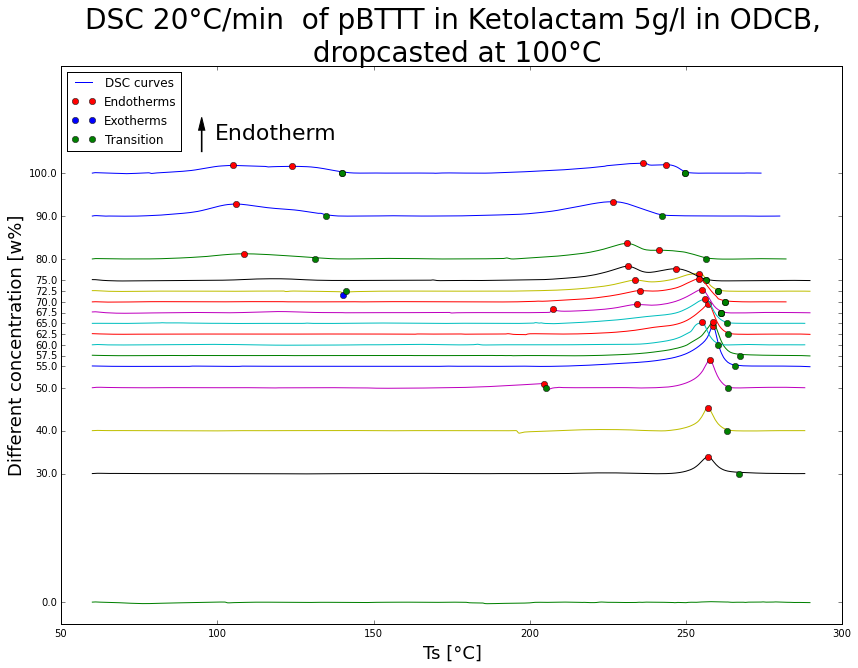

In [21]:
from m.curve import curveSketch
from m.phasediagram import transitions
%matplotlib inline

x = cleanData["Tr [°C]"].values
offset = 0
plt.figure(figsize=(14,10))

for i in range(len(c)):
    offset = concentrations[i]
    weight = metaData[c[i]][3]
    y = cleanData[c[i]].values / weight
    endoPeaks, endoTransitions, exoPeaks, exoTransitions = transitions(y, dy=0.03, linearFit=False)
    zeros, maxima, minima, iPs, halfExtremas = curveSketch(y, order=5)

    
    plt.plot(x, (y * 20 + offset))#
    #print(endoTransitions)
    
    plt.plot(x[maxima[0]],y[maxima[0]]*20+offset, "or")
    plt.plot(x[minima[0]],y[minima[0]]*20+offset, "ob")
    
    try:
        plt.plot(x[endoTransitions], np.zeros(len(endoTransitions))+ offset, "og")
        plt.plot(x[exoTransitions], np.zeros(len(exoTransitions))+ offset, "og")
        #plt.plot(x[iPs[0]],y[iPs[0]]*20+offset, "ob")
    except:
        continue
        
plt.title("DSC 20°C/min  of pBTTT in Ketolactam 5g/l in ODCB,\n dropcasted at 100°C", fontsize=28)
plt.xlabel("Ts [°C]", fontsize=18)
plt.yticks(concentrations)
plt.ylabel("Different concentration [w%]", fontsize=18)
plt.legend(["DSC curves", "Endotherms","Exotherms","Transition"], loc="upper left")
plt.text(100,108,"Endotherm",fontsize=22)
plt.arrow(95, 105, 0, 5, color="black", width=.2, head_width=2)
plt.xlim(50,300)
plt.ylim(-5,125)
plt.savefig("DSC 20CPerMin  of pBTTT in Ketolactam 5gPerL in ODCB dropcasted at 100C" + "_transitions" + ".svg", format="svg")
plt.show()


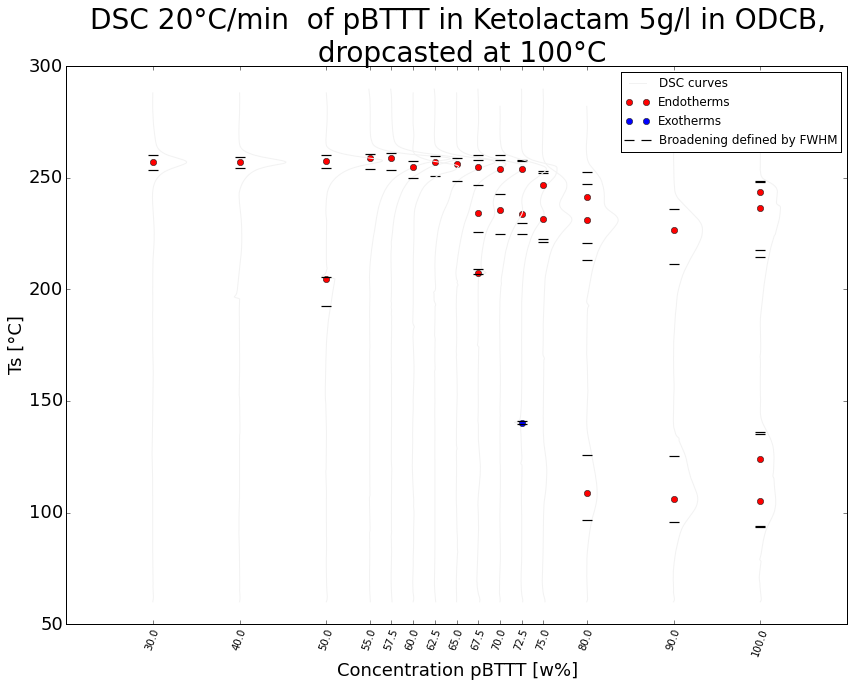

In [25]:
from m.curve import curveSketch
from m.phasediagram import transitions
%matplotlib inline

x = cleanData["Tr [°C]"].values
offset = 0
plt.figure(figsize=(14,10))

for i in range(len(c)):
    offset = concentrations[i]
    weight = metaData[c[i]][3]
    y = cleanData[c[i]].values / weight
    endoPeaks, endoTransitions, exoPeaks, exoTransitions = transitions(y,dy=0.03, linearFit=False)
    zeros, maxima, minima, iPs, halfExtremas = curveSketch(y,order=5)

    
    plt.plot((y * 20 + offset),x, color="0.95")
    
    plt.plot(np.zeros(len(maxima[0]))+ offset, x[maxima[0]], "or")
    plt.plot(np.zeros(len(minima[0]))+ offset, x[minima[0]], "ob")
    
    #plt.plot(np.zeros(len(endoTransitions))+ offset, x[endoTransitions], "og")
    #plt.plot(np.zeros(len(exoTransitions))+ offset, x[exoTransitions], "ob")
    #plt.plot(np.zeros(len(iPs[0]))+ offset, x[iPs[0]], "_k", ms=10, mew=1.2)
    plt.plot(np.zeros(len(halfExtremas[0]))+ offset, x[halfExtremas[0]], "_k", ms=10, mew=1.2)

plt.title("DSC 20°C/min  of pBTTT in Ketolactam 5g/l in ODCB,\n dropcasted at 100°C", fontsize=28)
plt.ylabel("Ts [°C]", fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(concentrations, rotation=70)
plt.xlabel("Concentration pBTTT [w%]", fontsize=18)
plt.legend(["DSC curves", "Endotherms","Exotherms","Broadening defined by FWHM"], loc="best")
plt.xlim(20,110)
#plt.ylim(100,330)
plt.savefig("DSC 20CPerMin  of pBTTT in Ketolactam 5gPerL in ODCB dropcasted at 100C" + "_phasediagram" + ".svg", format="svg")
plt.show()


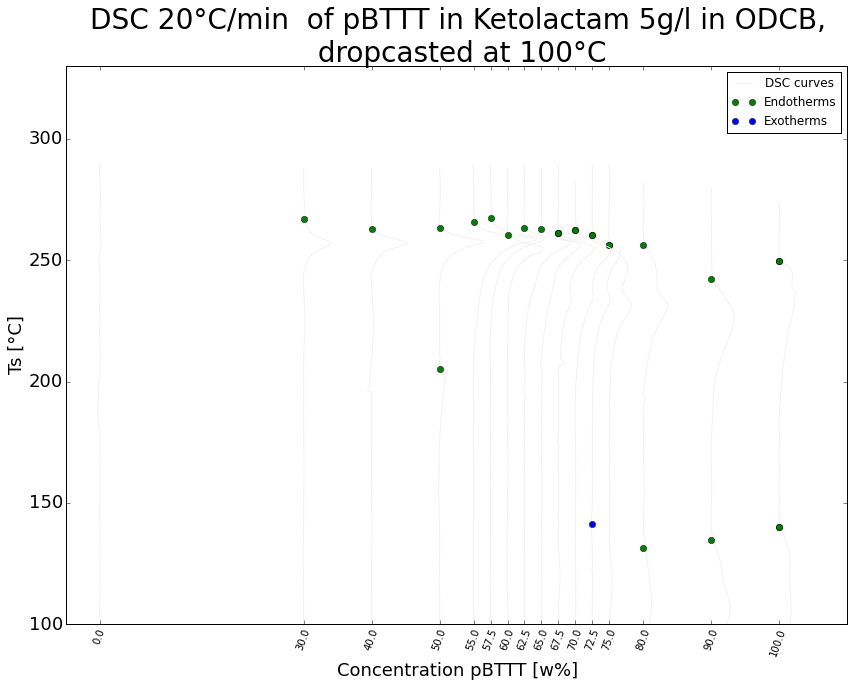

In [26]:
from m.curve import curveSketch
from m.phasediagram import transitions
%matplotlib inline

x = cleanData["Tr [°C]"].values
offset = 0
plt.figure(figsize=(14,10))

for i in range(len(c)):
    offset = concentrations[i]
    weight = metaData[c[i]][3]
    y = cleanData[c[i]].values / weight
    endoPeaks, endoTransitions, exoPeaks, exoTransitions = transitions(y, dy=0.03, linearFit=False)
    zeros, maxima, minima, iPs, halfExtremas = curveSketch(y,order=5)

    
    plt.plot((y * 20 + offset),x, color="0.95")
    
    plt.plot(np.zeros(len(endoTransitions))+ offset, x[endoTransitions], "og")
    plt.plot(np.zeros(len(exoTransitions))+ offset, x[exoTransitions], "ob")
    
    #plt.errorbar(np.zeros(len(endoTransitions))+ offset, x[endoTransitions], yerr=5, marker="o",
     #            mfc="g", ecolor="g", ls='none')
    #plt.errorbar(np.zeros(len(exoTransitions))+ offset, x[exoTransitions], yerr=5, marker="o",
     #            mfc="b", ecolor="b", ls='none')

plt.title("DSC 20°C/min  of pBTTT in Ketolactam 5g/l in ODCB,\n dropcasted at 100°C", fontsize=28)
plt.ylabel("Ts [°C]", fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(concentrations, rotation=70)
plt.xlabel("Concentration pBTTT [w%]", fontsize=18)
plt.legend(["DSC curves", "Endotherms","Exotherms"], loc="best")
plt.xlim(-5,110)
plt.ylim(100,330)
plt.savefig("DSC 20CPerMin of pBTTT in Ketolactam 5gPerL in ODCB dropcasted at 100C" + "_phasediagramTransitions" + ".svg", format="svg")
plt.show()


In [44]:
# Save all found values

phasediagram = pd.DataFrame(columns=["Concentration [w%]", "Endotherms [°C]", "Exotherms [°C]",
                                    "FWHM Points [°C]", "Endotherm transitions [°C]",
                                     "Exotherm transitions [°C]"])
x = cleanData["Tr [°C]"].values

for i in range(len(c)):

    weight = metaData[c[i]][3] # First curves
    y = cleanData[c[i]].values / weight
    endoPeaks, endoTransitions, exoPeaks, exoTransitions = transitions(y, dy=0.03, linearFit=False) # Make sure dy, linearFit=.. is the same
    zeros, maxima, minima, iPs, halfExtremas = curveSketch(y, order=5)
    
    phasediagram.loc[i] = [concentrations[i], x[endoPeaks], x[exoPeaks],
                           x[halfExtremas[0]], x[endoTransitions], x[exoTransitions]]
    
phasediagram.sort_values("Concentration [w%]").to_csv(
    "pBTTT in Ketolactam 5gPerL in ODCB dropcasted at 100C" + "_evaluation.csv", index=False)
phasediagram


,Concentration [w%],Endotherms [°C],Exotherms [°C],FWHM Points [°C],Endotherm transitions [°C],Exotherm transitions [°C]
0,55.0,[258.667],[],"[254.0, 260.667]",[265.667],[]
1,57.5,[258.667],[],"[253.333, 261.0]",[267.333],[]
2,62.5,[257.0],[],"[250.667, 259.667]",[263.333],[]
3,65.0,[256.0],[],"[248.333, 259.0]",[263.0],[]
4,67.5,"[207.333, 234.333, 255.0]",[],"[206.667, 209.0, 225.667, 260.0, 246.667, 258.0]","[261.333, 261.333, 261.333]",[]
5,72.5,"[233.667, 254.0]",[140.333],"[224.667, 258.0, 229.667, 257.333, 139.667, 14...","[260.333, 260.333]",[141.333]
6,75.0,"[231.333, 246.667]",[],"[222.667, 252.333, 221.0, 253.0]","[256.333, 256.333]",[]
7,90.0,"[106.0, 226.667]",[],"[95.667, 125.333, 211.333, 236.0]","[134.667, 242.333]",[]
8,80.0,"[108.667, 231.0]",[],"[96.667, 125.667, 220.667, 247.333, 213.333, 2...","[131.333, 256.333]",[]
9,70.0,"[235.333, 254.0]",[],"[225.0, 260.0, 242.667, 258.0]","[262.333, 262.333]",[]
